# **Projeto de** #


In [1]:
#Vamos importar os módulos que precisamos
from cmath import *
import math
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

<img src ='circuito.jfif' width='600'>

In [2]:
#tensão da fonte (pico)
Ufonte=5
#indutâncias
L=200e-6
#resistências
R=0.5
#capcitancias
C = 0.1e-6
# resistencia da carga:
Rc= 400

# lista possíveis frequencias
listaf = np.arange(10,100e3,10)
# Lista de possíveis K:
listak = np.linspace(0.085,0.15,10)

# Valores esperados:
w = 1/(math.sqrt(L*C))
f_referencia = w/(2*math.pi)

print(f'Valore referencia:{f_referencia}')

Valore referencia:35588.127170858854


In [3]:
def CalcularTransformador(Uf, Rc, XM, XC, XL):
    
    # Reatancia equivalente
    Xeq = (Rc*XC/(Rc+XC))
    
    Z=np.array([[R+XL+XC, -XM],[-XM, Xeq+R+XL]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    
    i1 =  i[0]
    i2 =  i[1]
    
    # Ddp e corrente na carga
    V2 = Xeq*i2
    icarga = V2/Rc
    
    return i1, i2, icarga , V2

Maior valor de i = 0.124 com k = 0.085
Maior valor de i = 0.119 com k = 0.092
Maior valor de i = 0.115 com k = 0.099
Maior valor de i = 0.112 com k = 0.107
Maior valor de i = 0.11 com k = 0.114
Maior valor de i = 0.108 com k = 0.121
Maior valor de i = 0.107 com k = 0.128
Maior valor de i = 0.106 com k = 0.136
Maior valor de i = 0.106 com k = 0.143
Maior valor de i = 0.105 com k = 0.15


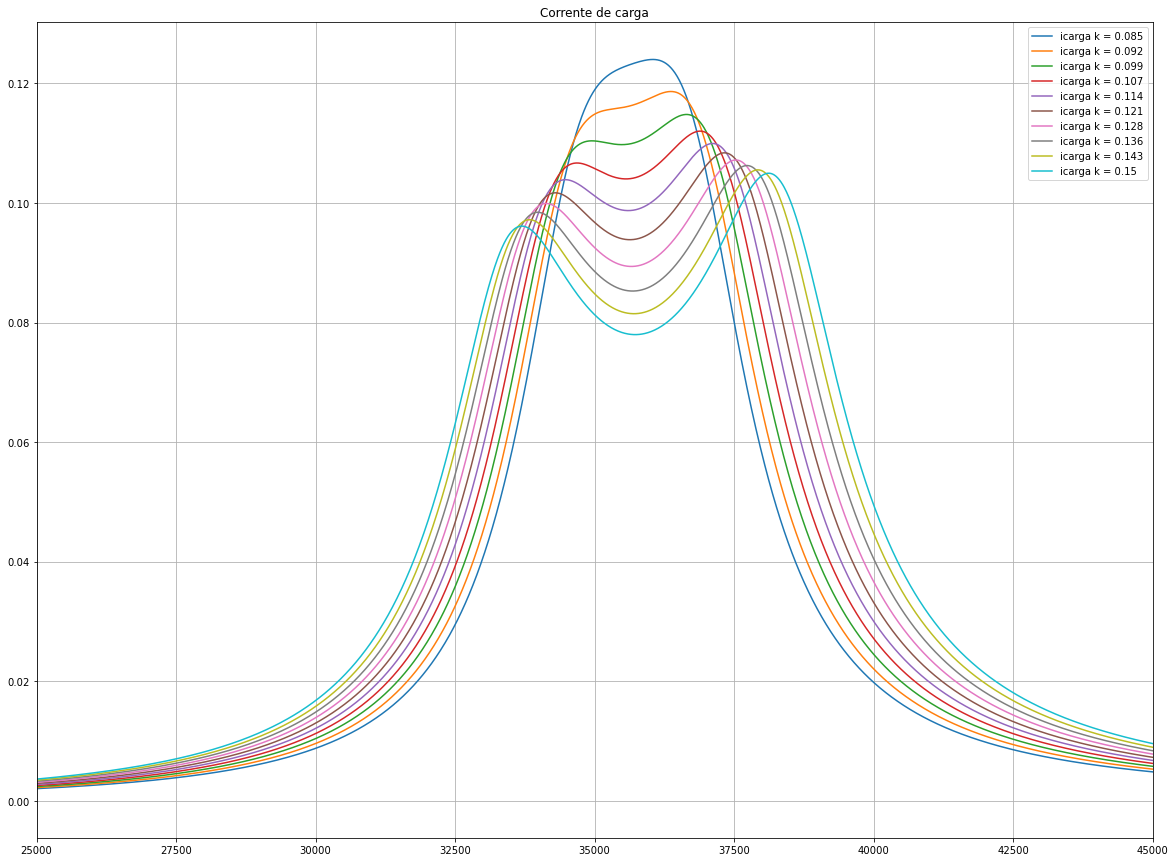

In [4]:
listaV2= []

plt.figure(figsize=(20,15))

for k in listak:
    listai1= []
    listai2= []
    listaicarga = []
    for f in listaf:
        
        # Calculando w e indutância:
        w = 2*math.pi*f
        M = k*sqrt(L*L)
        
        # Calculando reatâncias:
        XM=1j*w*M
        XC = 1/(w*C*1j)
        XL = 1j*w*L
        
        # Correntes e ddp na carga
        i1, i2, icarga , V_carga = CalcularTransformador(Ufonte, Rc, XM, XC, XL)

        listai1.append(np.abs(i1))
        listai2.append(np.abs(i2))
        listaicarga.append(np.abs(icarga))
        
    icaraga_max = max(np.abs(listaicarga))
    index = list(np.abs(listaicarga)).index(icaraga_max)
    print(f'Maior valor de i = {np.round(icaraga_max,3)} com k = {np.round(k, 3)}')
    
    plt.plot(listaf, listaicarga, label=f'icarga k = {np.round(k, 3)}')

plt.grid(True)
plt.legend()
plt.xlim(25000,45000)
plt.title("Corrente de carga")
plt.show()

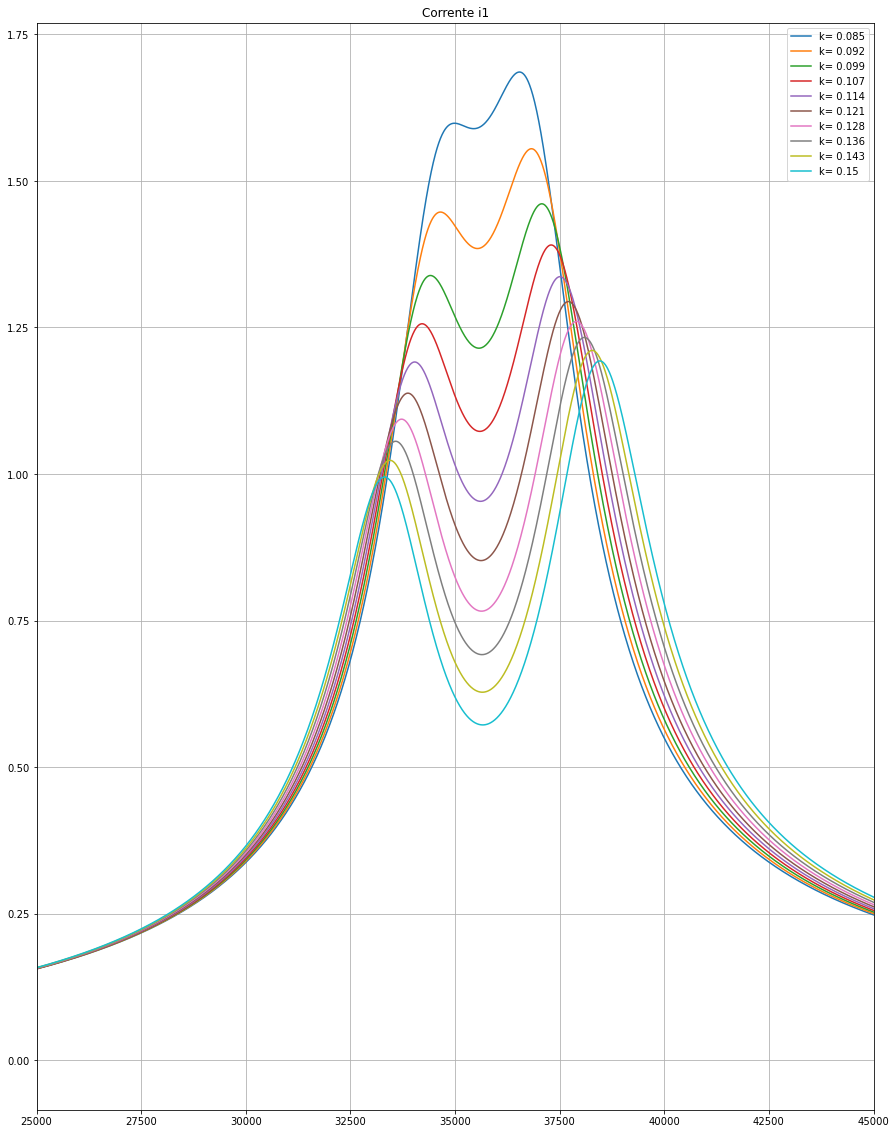

In [5]:
plt.figure(figsize=(15,20))
for k in listak:
    listai1= []
    for f in listaf:

        w = 2*math.pi*f
        M = k*sqrt(L*L)

        XM=1j*w*M
        XC = 1/(w*C*1j)
        XL = 1j*w*L

        i1, i2, icarga , V_carga = CalcularTransformador(Ufonte, Rc, XM, XC, XL)

        listai1.append(np.abs(i1))
    
    plt.plot(listaf, listai1, label=f'k= {np.round(k,3)}')
    
plt.grid(True)
plt.title("Corrente i1")
plt.xlim(25000, 45000)
plt.legend()
plt.show()    

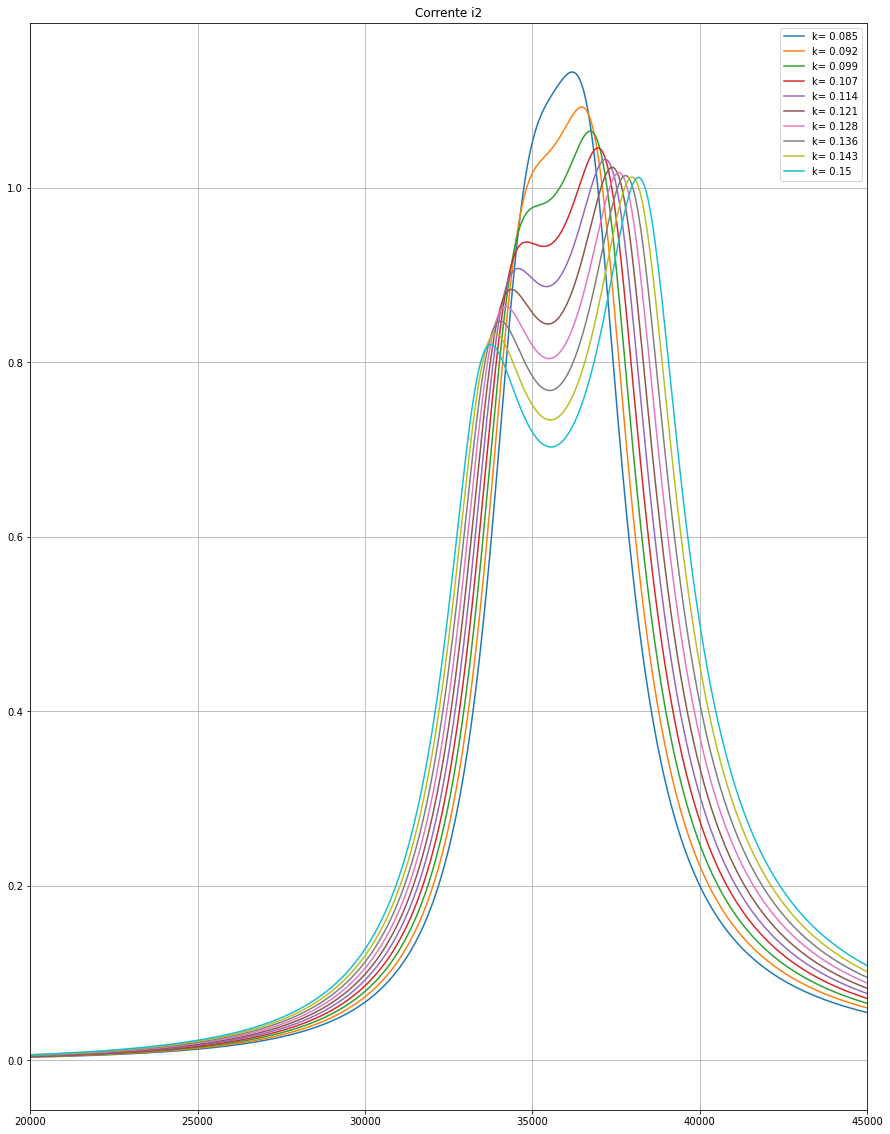

In [6]:
plt.figure(figsize=(15,20))

for k in listak:
    listai1= []
    listai2= []
    listaicarga = []
    listaPot_entrada = []
    listaPot_saida = []
    listaGanho = []
    for f in listaf:

        w = 2*math.pi*f
        M = k*sqrt(L*L)

        XM=1j*w*M
        XC = 1/(w*C*1j)
        XL = 1j*w*L

        i1, i2, icarga , V_carga = CalcularTransformador(Ufonte, Rc, XM, XC, XL)

        listai2.append(np.abs(i2))    
    plt.plot(listaf, listai2, label=f'k= {np.round(k,3)}')

plt.title("Corrente i2")
plt.grid(True)
plt.xlim(20000,45000)
plt.legend()
plt.show()

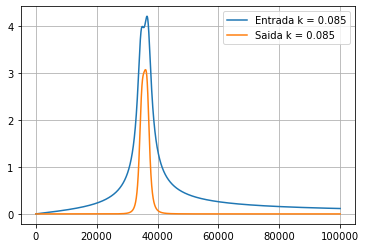

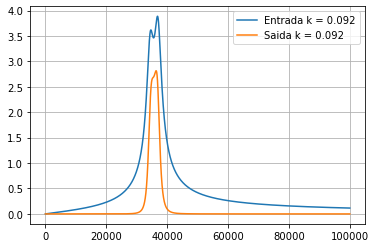

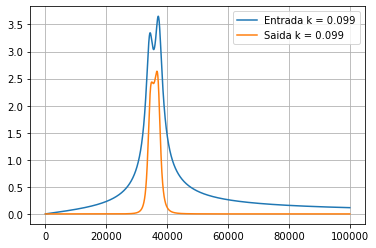

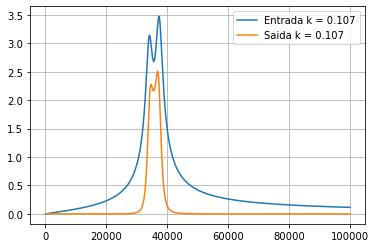

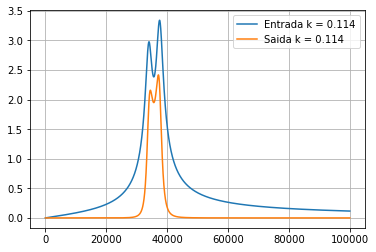

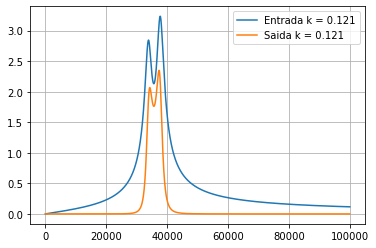

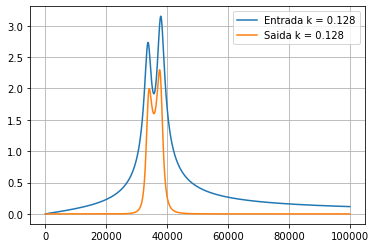

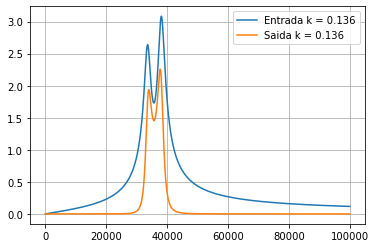

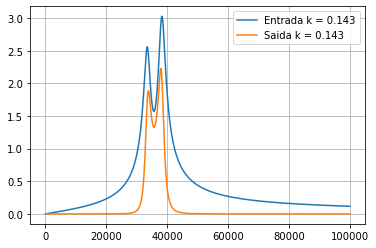

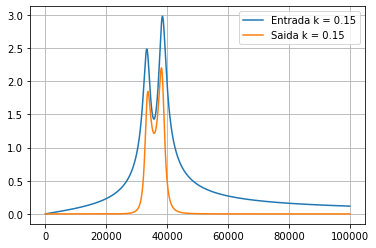

In [7]:
for k in listak:
    listaPot_entrada = []
    listaPot_saida = []
    for f in listaf:

        w = 2*math.pi*f
        M = k*sqrt(L*L)

        XM=1j*w*M
        XC = 1/(w*C*1j)
        XL = 1j*w*L

        i1, i2, icarga , V_carga = CalcularTransformador(Ufonte, Rc, XM, XC, XL)

        # Potencia:
        S2=V_carga/sqrt(2)*icarga.conjugate()/sqrt(2)
        S1=Ufonte/sqrt(2)*i1.conjugate()/sqrt(2)
        
        listaPot_saida.append(abs(S2))
        listaPot_entrada.append(abs(S1))
    
    plt.plot(listaf, listaPot_entrada, label=f'Entrada k = {np.round(k,3)}')
    plt.plot(listaf, listaPot_saida, label=f'Saida k = {np.round(k,3)}')
    plt.grid()
    plt.legend()
    plt.show()

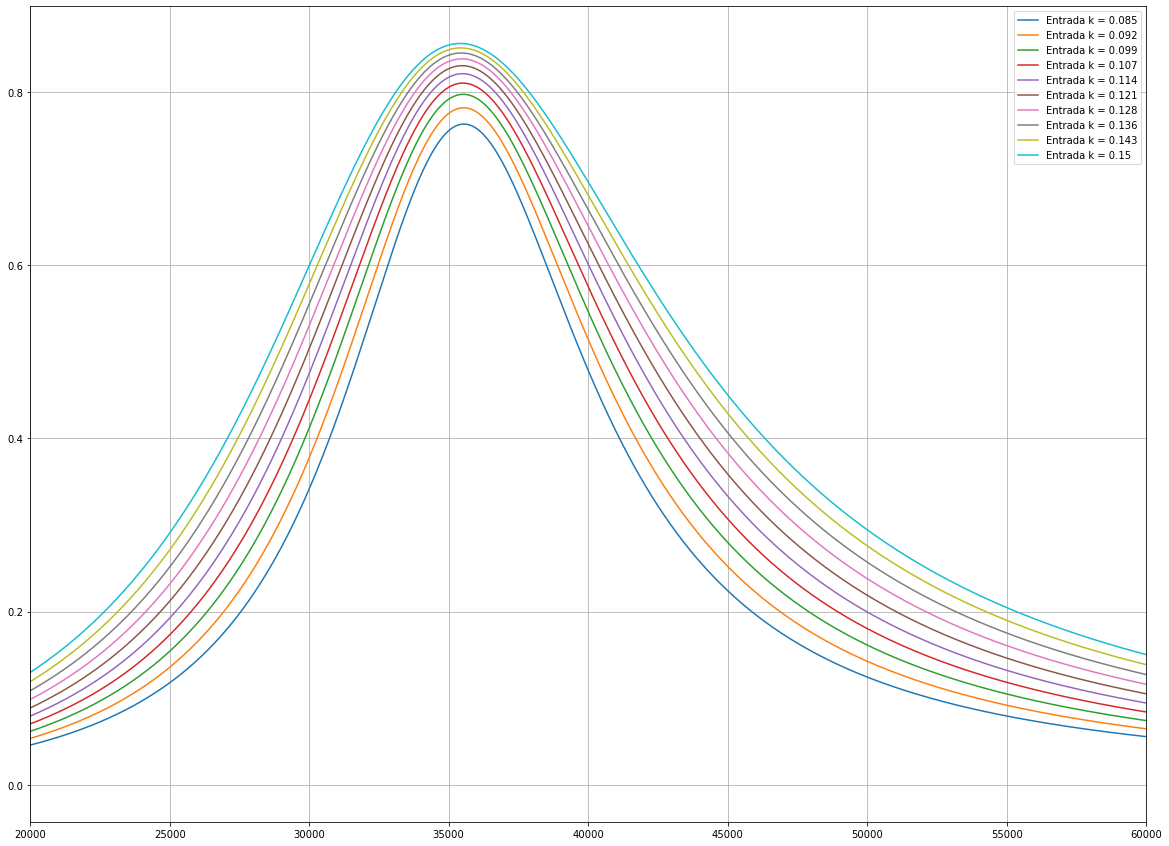

In [8]:
plt.figure(figsize=(20,15))
for k in listak:
    listaGanho = []
    for f in listaf:

        w = 2*math.pi*f
        M = k*sqrt(L*L)

        XM=1j*w*M
        XC = 1/(w*C*1j)
        XL = 1j*w*L

        i1, i2, icarga , V_carga = CalcularTransformador(Ufonte, Rc, XM, XC, XL)

        # Potencia:
        S2=V_carga/sqrt(2)*icarga.conjugate()/sqrt(2)
        S1=Ufonte/sqrt(2)*i1.conjugate()/sqrt(2)
        
        listaGanho.append(S2.real/S1.real)
    
    plt.plot(listaf, listaGanho, label=f'Entrada k = {np.round(k,3)}')
    plt.legend()

plt.xlim(20000,60000)
plt.grid(True)
plt.show()

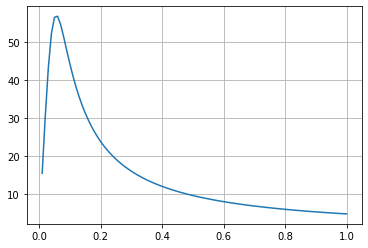

In [10]:
listaV2= []
listak = np.linspace(0.01,1,100)

Rc=400
f = 36000
for k in listak:    
    w = 2*math.pi*f
    M = k*sqrt(L*L)

    XM=1j*w*M
    XC = 1/(w*C*1j)
    XL = 1j*w*L

    i1, i2, icarga , V_carga = CalcularTransformador(Ufonte, Rc, XM, XC, XL)
    listaV2.append(np.abs(V_carga))
    
plt.plot(listak, listaV2)
plt.grid(True)
plt.show()